In [1]:
# Import warnings and make it so that warnings are errors (but also ignore a
# few kinds of irritating warnings like deprication warnings that arise from
# other libraries):
import warnings
warnings.filterwarnings('error')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ImportWarning)

# Import numpy and scipy
import numpy                 as     np
import scipy                 as     sp

# Import a fwe other standard libraries:
import os, sys, math, itertools, collections


# Import matplotlib/pyplot and tell it that we want inline plots:
import matplotlib
import matplotlib.pyplot     as     plt
%matplotlib inline
%gui qt

# We also want the pimms library to be loaded
import pimms

# In case your FreeSurfer subjects directory is not in the SUBJECTS_DIR
# environment variable at python startup, you can optionally put it here;
# this just means you can refer to FreeSurfer subjects by their ID's
# instead of by their full paths
#os.environ['SUBJECTS_DIR'] = '/Volumes/server/Freesurfer_subjects'

for p in ['/Users/nben/Code/sco',#'/Volumes/server/Projects/SOC/pycode/sco',
          '/Users/nben/Code/test/neuropythy']:
    if p not in sys.path: sys.path.insert(0, p)

# Import the SCO!
import sco

# Optionally, these contain functions thay are part of the SCO calculation.
import sco.anatomy
import sco.stimulus
import sco.contrast
import sco.pRF
import sco.util
import sco.analysis
import sco.impl

In [2]:
# As a simple example, we create an instance of our basic SCO model:
mdl = sco.build_model('benson17')

In [3]:
# We can ask it what its afferent parameters are:
# (These are the parameters that can be given to the model; not all are required.)
mdl.afferents

# There are a lot of potential parameters; most of them are not important right now
# and have perfectly good default values.

('create_directories',
 'import_filter',
 'pixels_per_degree',
 'divisive_normalization_schema',
 'compressive_constants_by_label',
 'output_directory',
 'normalized_pixels_per_degree',
 'background',
 'gabor_orientations',
 'gains_by_label',
 'pRF_n_radii',
 'contrast_constants_by_label',
 'aperture_radius',
 'max_eccentricity',
 'measurements_filename',
 'modality',
 'subject',
 'pRF_sigma_slopes_by_label',
 'stimulus',
 'output_suffix',
 'pRF_sigma_offsets_by_label',
 'cpd_sensitivity_function',
 'aperture_edge_width',
 'divisive_exponents_by_label',
 'use_spatial_gabors',
 'output_prefix',
 'saturation_constants_by_label',
 'gamma')

In [4]:
# Ask it which parameters have default values (and what they are):
# (note that a pmap is a kind of persistent dict object; to get a nicer-looking output,
# run dict(mdl.defaults) instead of just mdl.defaults.)
mdl.defaults

pmap({'aperture_radius': None, 'create_directories': False, 'max_eccentricity': 12, 'modality': 'volume', 'import_filter': None, 'pRF_sigma_slopes_by_label': 'sco.impl.benson17.pRF_sigma_slopes_by_label_Wandell2015', 'output_suffix': '', 'divisive_normalization_schema': 'Heeger1992', 'contrast_constants_by_label': 'sco.impl.benson17.contrast_constants_by_label_Kay2013', 'gains_by_label': 'sco.impl.benson17.gains_by_label_Benson2017', 'cpd_sensitivity_function': 'sco.impl.benson17.cpd_sensitivity', 'compressive_constants_by_label': 'sco.impl.benson17.compressive_constants_by_label_Kay2013', 'normalized_pixels_per_degree': 12, 'background': 0.5, 'gabor_orientations': 8, 'aperture_edge_width': None, 'divisive_exponents_by_label': 'sco.impl.benson17.divisive_exponents_by_label_Kay2013', 'use_spatial_gabors': False, 'output_prefix': '', 'pRF_sigma_offsets_by_label': 'sco.impl.benson17.pRF_sigma_offsets_by_label_Wandell2015', 'pRF_n_radii': 3.0, 'saturation_constants_by_label': 'sco.impl.ben

In [5]:
# Individual parameters have documentation: Here, we ask the model about one of
# its parameters:
print mdl.afferent_docs['subject']

subject

(import_subject) subject: Must be one of (a) the name of a FreeSurfer subject found on the subject path,
        (b) a path to a FreeSurfer subject directory, or (c) a neuropythy FreeSurfer subject
        object.
    


In [6]:
# The model produces 'efferent' values (these are model outputs); here we ask
# it what outputs it produces (pvector, like pmap, is a persistent list; you
# can get a nicer-looking output by changing the line below to
# tuple(mdl.efferents.keys())).
mdl.efferents.keys()

pvector(['gamma_correction_function', 'measurements', 'stimulus_map', 'pRFs', 'divisive_normalization_parameters', 'pRF_radii', 'prediction_analysis_labels', 'contrast_filter', 'eccentricities', 'contrast_energies', 'corresponding_indices', 'benson17_default_options_used', 'freesurfer_subject', 'pixel_centers', 'pRF_SOC', 'labels', 'image_names', 'measurement_pRFs', 'measurement_eccentricities', 'measurement_hemispheres', 'cortex_coordinates', 'pRF_centers', 'contrast_constants', 'measurement_polar_angles', 'coordinates', 'cortex_indices', 'cortex_affine', 'divisive_normalization_function', 'measurement_labels', 'exported_vega', 'measurement_per_prediction', 'compressive_constants', 'cpd_sensitivities', 'prediction', 'exported_files', 'measurement_indices', 'pRF_sigma_offsets', 'polar_angles', 'exported_report_filenames', 'exported_predictions_filenames', 'stimulus_ordering', 'hemispheres', 'measurement_coordinates', 'pRF_sigma_slopes', 'exported_analysis_filenames', 'prediction_per_me

In [7]:
# We can also ask the model for help about one of the ouptuts:
print mdl.efferent_docs['pRF_SOC']

pRF_SOC

(pRF_SOC) pRF_SOC: Will be an array of the second-order-contrast energies, one per pRF per image;
        these will be stored in an (n x m) matrix where n is the number of pRFs and m is the
        number of images.
    


In [8]:
# Results may be generated by providing the model with parameters; parameters
# may be provided as a dict of key-value pairs followed by any number of
# keyword arguments; in the following code, the parameters subject,
# max_eccentricity, pixels_per_Degree, and stimulus are all passed to the
# model.

# The subject is just the freesurfer subject path (this is a sample subject
# on acadia that you don't have to worry about accidentally editing/breaking)
subject_path = '/Volumes/server/Freesurfer_subjects/test-sub'

# The stimulus file list is just a list of image files; these files are on
# acadia in the Projects/SCO/data/Kay2008/stimuli directory:
stimuli_path = '/Volumes/server/Projects/SCO/data/Kay2008/stimuli'
stimuli = [os.path.join(stimuli_path, 'validate_%04d.png' % ii) for ii in range(10)]

results = mdl({'subject':subject_path, 'max_eccentricity':6},
              pixels_per_degree=6, stimulus=stimuli,
              aperture_radius=6, aperture_edge_width=1)
              # Other parameters can be added here; e.g.,
              # use_spatial_gabors=True

# Note that the results are returned instantaneously; this is not because the
# calculation is already finished, but because results is a dictionary-like
# object whose keys are the output values, which have not been calculated yet.
# The results won't actually be calculated until you ask for them, so if you
# immediately lookup results['prediction'] the calculations will run then;
# sunsequent requests for results['prediction'] will then return immediately.

In [9]:
# Go ahead and calculate the predictions now; this may take a few minutes
# the first time it's called.
pred = results['prediction']

# What's the shape of the prediction? (should be <number of voxels> x <number of stimulus images>)
pred.shape

(16172, 10)

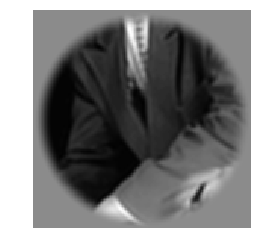

In [12]:
# If we want to look at the images that were imported, we can look at one
# of the output values, 'image_array', which is just a stack of the stimulus
# images after they've been normalized to the same size.
image_no = 1
plt.imshow(results['image_array'][image_no], cmap='gray')
plt.axis('off');

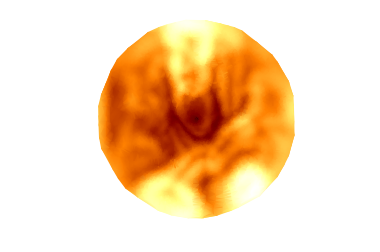

In [13]:
# What do the predictions look like?
image_no = 1
varea    = 1 # just look at the V1 prediction
sco.util.cortical_image(pred, results['labels'], results['pRFs'], results['max_eccentricity'],
                        visual_area=varea, image_number=image_no);

In [44]:
# The model we built earlier (mdl) is actually a pimms calculation plan:
type(mdl)

pimms.calculation.Plan

In [48]:
# Calculation plans are just sets of calculation functions; each of these
# calculation functions is like a single step in the model:
dict(mdl.nodes)

{'calc_coordinates': <pimms.calculation.Calc at 0x1099b2550>,
 'compressive_constants': <pimms.calculation.Calc at 0x10ab6f5d0>,
 'compressive_nonlinearity': <pimms.calculation.Calc at 0x10ab53f90>,
 'contrast_constants': <pimms.calculation.Calc at 0x10ab53d90>,
 'contrast_energies': <pimms.calculation.Calc at 0x10ab53cd0>,
 'contrast_filter': <pimms.calculation.Calc at 0x10ab53c50>,
 'correspondence_data': <pimms.calculation.Calc at 0x10ab6fc10>,
 'correspondence_maps': <pimms.calculation.Calc at 0x10ab6fe50>,
 'cpd_sensitivites': <pimms.calculation.Calc at 0x10ab6f850>,
 'default_options': <pimms.calculation.Calc at 0x10ad14790>,
 'divisive_normalization': <pimms.calculation.Calc at 0x10ad1c210>,
 'export_analysis': <pimms.calculation.Calc at 0x1099a0cd0>,
 'export_predictions': <pimms.calculation.Calc at 0x1099a0c50>,
 'export_report_images': <pimms.calculation.Calc at 0x1099a0dd0>,
 'export_vega': <pimms.calculation.Calc at 0x1099a0e90>,
 'exported_files': <pimms.calculation.Calc a

In [59]:
# Notice that one of these calculation functions is called pRF_SOC; we can look at
# the actual function documentation like this:
help(mdl.nodes['pRF_SOC'].function)

Help on function calc_pRF_SOC in module sco.contrast.core:

calc_pRF_SOC(pRFs, contrast_energies, cpd_sensitivities, divisive_normalization_parameters, contrast_constants, normalized_pixels_per_degree)
    calc_pRF_SOC is a calculator that is responsible for calculating the individual SOC responses
    of the pRFs by extracting their pRFs from the contrast_energies and weighting them according
    to the cpd_sensitivities.
    
    Required afferent parameters:
      * pRFS
      * contrast_energies
      * cpd_sensitivities
      * divisive_normalization_parameters
    
    Provided efferent parameters:
      @ pRF_SOC Will be an array of the second-order-contrast energies, one per pRF per image;
        these will be stored in an (n x m) matrix where n is the number of pRFs and m is the
        number of images.



In [64]:
# If we were to write a replacement version of this function, we might do it like
# this, then edit our model to have the new function:

@pimms.calc('pRF_SOC') # This decorator makes the function a Calc object
def replacement_SOC_calc(pRFs, contrast_energies, cpd_sensitivities,
                         contrast_constants, normalized_pixels_per_degree):
    # code here...
    pass

# Then we could just replace the old pRF_SOC step; the mdl won't let you
# change it directly, but the set method will return a new identical model
# with just the change requested (this is efficient):
new_mdl = mdl.set(pRF_SOC=replacement_SOC_calc)

In [ ]:
# Of course, new_mdl won't work right now because we haven't written the function
# replacement_SOC_calc, but this is how we would do it!